# Project the Drift Velocity onto the Ice Edge Coordinate System

In [54]:
import cftime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib widget

In [55]:
df = pd.read_csv('../../data/play1_df.csv')
df.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'time', 'latitude', 'longitude', 'hs',
       'wave_direction', 'wave_direction_mathconv', 'drift_speed',
       'drift_direction', 'instrument_type', 'windspd', 'winddir', 'swiftnum',
       'winddir_mathconv', 'wave_period', 'along ice coord', 'cross ice coord',
       'ice edge bearing', 'ice edge origin lon', 'ice edge origin lat',
       'along ice drift speed', 'cross ice drift speed', 'ice concentration'],
      dtype='object')

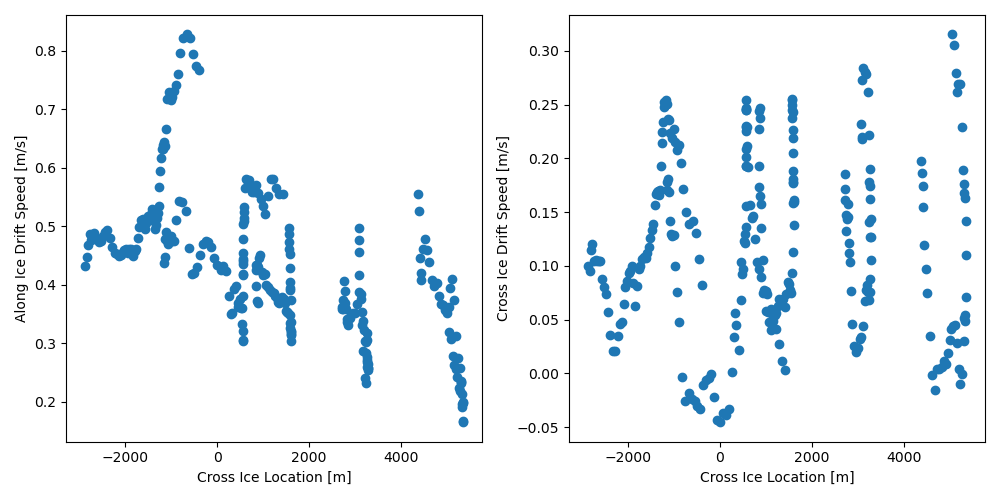

In [56]:
# Dot product between the ice edge bearing and the drift direction
along_ice_drift_speed = df['drift_speed'] * np.cos(np.deg2rad(df['drift_direction'] - df['ice edge bearing']))
cross_ice_drift_speed = df['drift_speed'] * np.sin(np.deg2rad(df['drift_direction'] - df['ice edge bearing']))

# Plot the drift speeds in the new coordinate system
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.scatter(df['cross ice coord'], along_ice_drift_speed)
ax1.set_xlabel('Cross Ice Location [m]')
ax1.set_ylabel('Along Ice Drift Speed [m/s]')

ax2.scatter(df['cross ice coord'], cross_ice_drift_speed)
ax2.set_xlabel('Cross Ice Location [m]')
ax2.set_ylabel('Cross Ice Drift Speed [m/s]')

plt.tight_layout()

In [57]:
mdates.datestr2num(df['time'][0])

19244.891666666714

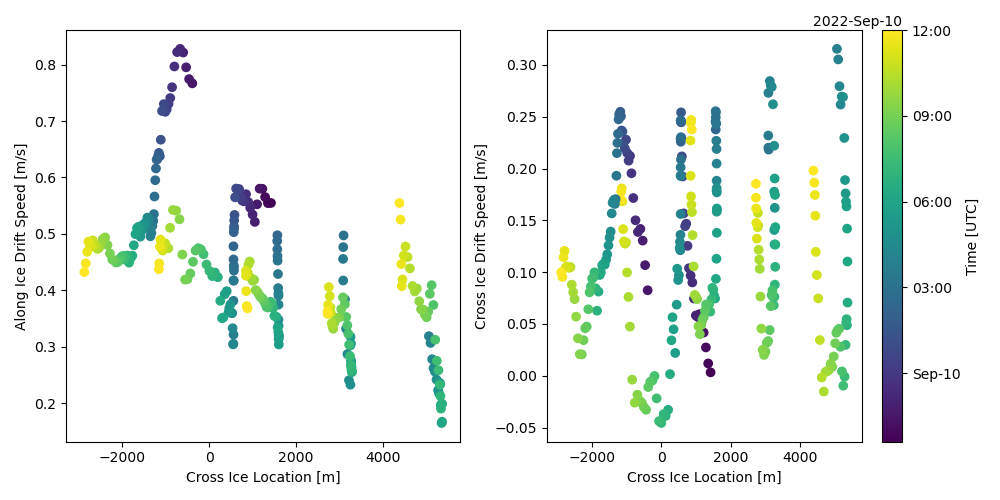

In [58]:
# Plot the drift speeds in the new coordinate system
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.scatter(df['cross ice coord'], along_ice_drift_speed, c=mdates.datestr2num(df['time']))
ax1.set_xlabel('Cross Ice Location [m]')
ax1.set_ylabel('Along Ice Drift Speed [m/s]')

im = ax2.scatter(df['cross ice coord'], cross_ice_drift_speed, c=mdates.datestr2num(df['time']))
cbar = fig.colorbar(im)
loc = mdates.AutoDateLocator(maxticks=6)
cbar.ax.yaxis.set_major_locator(loc)
cbar.ax.yaxis.set_major_formatter(mdates.ConciseDateFormatter(loc))
cbar.set_label('Time [UTC]')
im.set_label('Time')
ax2.set_xlabel('Cross Ice Location [m]')
ax2.set_ylabel('Cross Ice Drift Speed [m/s]')

plt.tight_layout()

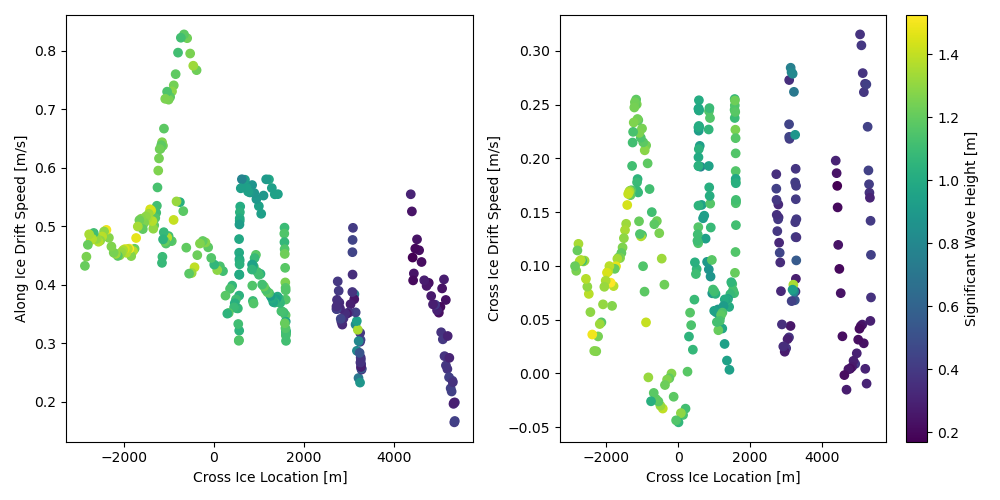

In [59]:
# Plot the drift speeds in the new coordinate system
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.scatter(df['cross ice coord'], along_ice_drift_speed, c=df['hs'])
ax1.set_xlabel('Cross Ice Location [m]')
ax1.set_ylabel('Along Ice Drift Speed [m/s]')

im = ax2.scatter(df['cross ice coord'], cross_ice_drift_speed, c=df['hs'])
cbar = fig.colorbar(im)
cbar.set_label('Significant Wave Height [m]')
im.set_label('Time')
ax2.set_xlabel('Cross Ice Location [m]')
ax2.set_ylabel('Cross Ice Drift Speed [m/s]')

plt.tight_layout()

Need to split this analysis back into windows as we did before to get a look at what is going on. 